# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_df.to_csv("combined_mouse_metadata_and_study_results")
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
num_mice = len(combined_df["Mouse ID"].unique())
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
## found code by searching on Google. This will identify rows with duplicates of both Mouse ID and Timepoint.
duplicates = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicates)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female 

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_id_to_drop = "g989"
data_no_duplicate = combined_df[combined_df["Mouse ID"] != mouse_id_to_drop]
data_no_duplicate.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_no_dups = len(data_no_duplicate["Mouse ID"].unique())
mouse_count_no_dups

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugs = data_no_duplicate["Drug Regimen"]

tumor_mean = data_no_duplicate["Tumor Volume (mm3)"].groupby(drugs).mean()
tumor_median = data_no_duplicate["Tumor Volume (mm3)"].groupby(drugs).median()
tumor_var = data_no_duplicate["Tumor Volume (mm3)"].groupby(drugs).var()
tumor_std = data_no_duplicate["Tumor Volume (mm3)"].groupby(drugs).std()
tumor_sem = data_no_duplicate["Tumor Volume (mm3)"].groupby(drugs).sem()
tumor_count = data_no_duplicate["Tumor Volume (mm3)"].groupby(drugs).count()

summary_data = {"Mean Tumor Volume":tumor_mean, "Median Tumor Volume":tumor_median, "Tumor Volume Variance":tumor_var,
                                    "Tumor Volume Std. Dev.":tumor_std, "Tumor Volume Std. Err.":tumor_sem, "Tumor Count Per Drug":tumor_count}

summary_df = pd.DataFrame(summary_data)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.,Tumor Count Per Drug
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

drugs = data_no_duplicate["Drug Regimen"]

# Specify the aggregation functions you want to apply
calculations = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem", "count"]}

# Use the aggregate method to apply the specified aggregation functions
summary_df = data_no_duplicate.groupby(data_no_duplicate["Drug Regimen"]).agg(calculations)
summary_df

Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

                    
             count  
Drug Regimen        
Capomulin      230  
Ceftamin       178  
Infubinol      178  
Ketapril       188  
Naftisol       186  
Placebo        181  
Propriva       148  
Ramicane       228  
Stelasyn       181  
Zoniferol      182

## Bar and Pie Charts

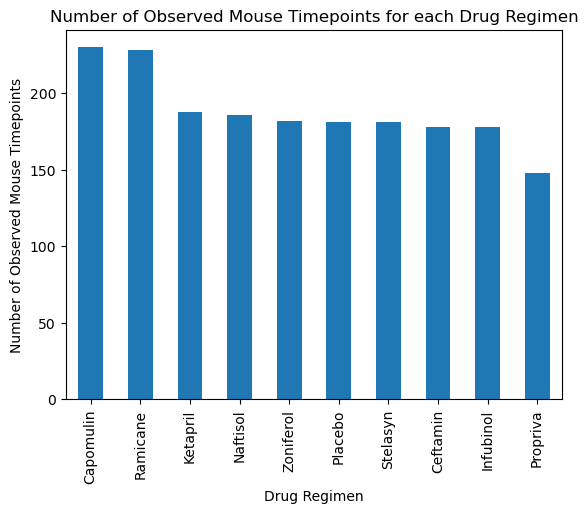

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#mouse_count_drug = data_no_duplicate["Mouse ID"].groupby(drugs).count()
# data_no_duplicate = data_no_duplicate.set_index("Drug Regimen")
# data_no_duplicate
summary_df = summary_df.reset_index()

# Sort the DataFrame by the count column in descending order
summary_df = summary_df.sort_values(by=("Tumor Volume (mm3)", "count"), ascending=False)

summary_df.plot(kind= "bar", x="Drug Regimen", y=("Tumor Volume (mm3)", "count"), title = "Number of Observed Mouse Timepoints for each Drug Regimen",
                   xlabel = "Drug Regimen", ylabel = "Number of Observed Mouse Timepoints", label="Number of Observed Mouse Timepoints", legend=False)


plt.show()

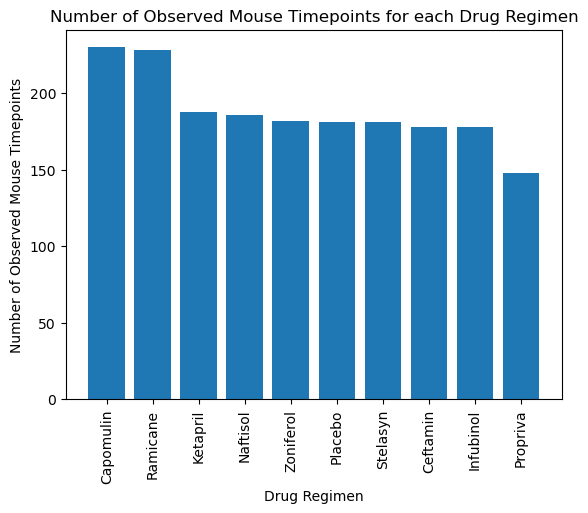

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
summary_df = summary_df.reset_index()

# Sort the DataFrame by the count column in descending order
summary_df = summary_df.sort_values(by=("Tumor Volume (mm3)", "count"), ascending=False)

plt.bar(summary_df["Drug Regimen"], summary_df[("Tumor Volume (mm3)", "count")])

plt.xticks(rotation=90)



plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.title("Number of Observed Mouse Timepoints for each Drug Regimen")

plt.show()

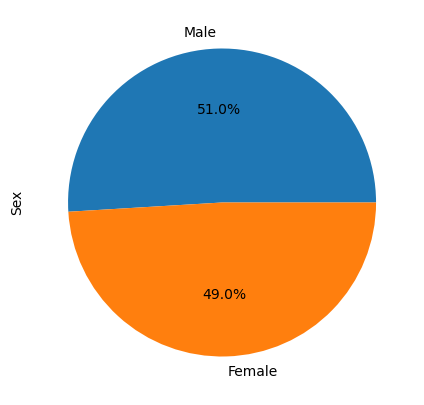

Sex
Male      958
Female    922
Name: count, dtype: int64


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = data_no_duplicate["Sex"].value_counts()

mouse_gender.plot.pie(y=data_no_duplicate["Sex"].value_counts(), autopct="%1.1f%%", figsize=(5, 5), ylabel = "Sex")
plt.show()

print(data_no_duplicate["Sex"].value_counts())

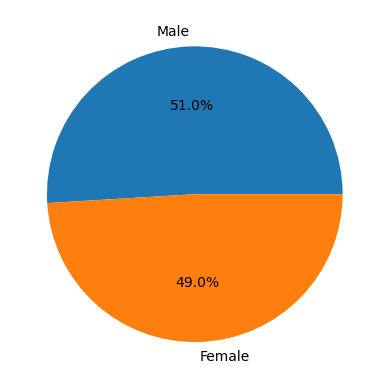

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = data_no_duplicate["Sex"].value_counts()
gender_labels=["Male", "Female"]

plt.pie(mouse_gender, labels=gender_labels, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# data_regimens = data_no_duplicate.loc[(data_no_duplicate["Drug Regimen"]=="Capomulin") | 
#                                       (data_no_duplicate["Drug Regimen"]=="Ramicane")  |
#                                       (data_no_duplicate["Drug Regimen"]=="Infubinol") |
#                                       (data_no_duplicate["Drug Regimen"]=="Ceftamin")]


# # data_regimens_final = data_regimens[data_regimens["Timepoint"] == 45]
# data_regimens_final = data_regimens.loc[data_regimens.groupby("Mouse ID")["Timepoint"].max()]
# data_regimens_final.head()

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# columns = ["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen", "Weight (g)"]
# data_regimens_final = data_regimens_final[columns]
# data_regimens_final = data_regimens_final.set_index("Mouse ID")
# data_regimens_final.head()

# final_volume = data_regimens_final["Tumor Volume (mm3)"]
# final_volume

max_tumor = data_no_duplicate.groupby("Mouse ID")["Timepoint"].max()
max_tumor = max_tumor.reset_index()
# max_tumor
max_tumor_data = max_tumor.merge(data_no_duplicate, on=["Mouse ID", "Timepoint"], how="left")
# merge_data.head(15)

In [14]:
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_capomulin = []
tumor_vol_ramicane = []
tumor_vol_infubinol = []
tumor_vol_ceftamin = []

for treatment in treatments_list:
    final_tumor_vol = max_tumor_data.loc[max_tumor_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"].reset_index(drop=True)
    
    if treatment == "Capomulin":
        tumor_vol_capomulin.extend(final_tumor_vol)
    elif treatment == "Ramicane":
        tumor_vol_ramicane.extend(final_tumor_vol)
    elif treatment == "Infubinol":
        tumor_vol_infubinol.extend(final_tumor_vol)
    elif treatment == "Ceftamin":
        tumor_vol_ceftamin.extend(final_tumor_vol)
        
final_vol_series_capomulin = pd.Series(tumor_vol_capomulin)
final_vol_series_ramicane = pd.Series(tumor_vol_ramicane)
final_vol_series_infubinol = pd.Series(tumor_vol_infubinol)
final_vol_series_ceftamin = pd.Series(tumor_vol_ceftamin)

final_volume_df = pd.DataFrame({
    "Capomulin":final_vol_series_capomulin,
    "Ramicane":final_vol_series_ramicane,
    "Infubinol":final_vol_series_infubinol,
    "Ceftamin":final_vol_series_ceftamin
})

final_volume_df

quartiles = final_volume_df.quantile([0.25, 0.75])
# print(quartiles)

iqr = final_volume_df.quantile(0.75) - final_volume_df.quantile(0.25)
# print(iqr)

iqr_capomulin = final_volume_df["Capomulin"].quantile(0.75) - final_volume_df["Capomulin"].quantile(0.25)
iqr_ramicane = final_volume_df["Ramicane"].quantile(0.75) - final_volume_df["Ramicane"].quantile(0.25)
iqr_infubinol = final_volume_df["Infubinol"].quantile(0.75) - final_volume_df["Infubinol"].quantile(0.25)
iqr_ceftamin = final_volume_df["Ceftamin"].quantile(0.75) - final_volume_df["Ceftamin"].quantile(0.25)

lower_bound_capomulin = final_volume_df["Capomulin"].quantile(0.25) - 1.5 * iqr_capomulin
upper_bound_capomulin = final_volume_df["Capomulin"].quantile(0.75) + 1.5 * iqr_capomulin

lower_bound_ramicane = final_volume_df["Ramicane"].quantile(0.25) - 1.5 * iqr_ramicane
upper_bound_ramicane = final_volume_df["Ramicane"].quantile(0.75) + 1.5 * iqr_ramicane

lower_bound_infubinol = final_volume_df["Infubinol"].quantile(0.25) - 1.5 * iqr_infubinol
upper_bound_infubinol = final_volume_df["Infubinol"].quantile(0.75) + 1.5 * iqr_infubinol

lower_bound_ceftamin = final_volume_df["Ceftamin"].quantile(0.25) - 1.5 * iqr_ceftamin
upper_bound_ceftamin = final_volume_df["Ceftamin"].quantile(0.75) + 1.5 * iqr_ceftamin

outliers_capomulin = final_volume_df.loc[(final_volume_df["Capomulin"] < lower_bound_capomulin) | (final_volume_df["Capomulin"] > upper_bound_capomulin), "Capomulin"]
outliers_ramicane = final_volume_df.loc[(final_volume_df["Ramicane"] < lower_bound_ramicane) | (final_volume_df["Ramicane"] > upper_bound_ramicane), "Ramicane"]
outliers_infubinol = final_volume_df.loc[(final_volume_df["Infubinol"] < lower_bound_infubinol) | (final_volume_df["Infubinol"] > upper_bound_infubinol), "Infubinol"]
outliers_ceftamin = final_volume_df.loc[(final_volume_df["Ceftamin"] < lower_bound_ceftamin) | (final_volume_df["Ceftamin"] > upper_bound_ceftamin), "Ceftamin"]

print(f"The outlier for Capomulin is {outliers_capomulin.values}.")
print(f"The outlier for Ramicane is {outliers_ramicane.values}.")
print(f"The outlier for Infubinol is {outliers_infubinol.values}.")
print(f"The outlier for Ceftamin is {outliers_ceftamin.values}.")

The outlier for Capomulin is [].
The outlier for Ramicane is [].
The outlier for Infubinol is [36.3213458].
The outlier for Ceftamin is [].


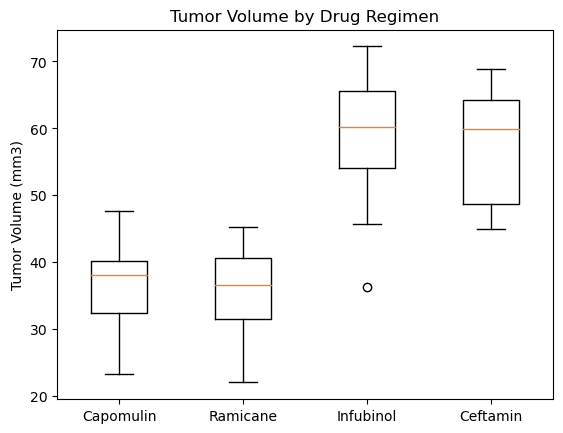

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# labels = treatment_list
# first parameter is final tumor vol

# data for each drug regimen
data_to_plot = [final_volume_df["Capomulin"], final_volume_df["Ramicane"], final_volume_df["Infubinol"], final_volume_df["Ceftamin"]]

# Create a boxplot
fig1, ax1 = plt.subplots()
ax1.boxplot(data_to_plot, labels=treatments_list)
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.show()


In [16]:
# # Put treatments into a list for for loop (and later for plot labels)
# treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# tumor_vol_capomulin = []
# tumor_vol_ramicane = []
# tumor_vol_infubinol = []
# tumor_vol_ceftamin = []

# for treatment in treatments_list:
#     final_tumor_vol = max_tumor_data.loc[max_tumor_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
#     if treatment == "Capomulin":
#         tumor_vol_capomulin.append(final_tumor_vol)
#     elif treatment == "Ramicane":
#         tumor_vol_ramicane.append(final_tumor_vol)
#     elif treatment == "Infubinol":
#         tumor_vol_infubinol.append(final_tumor_vol)
#     elif treatment == "Ceftamin":
#         tumor_vol_ceftamin.append(final_tumor_vol)


# # final_vol_lists = [[tumor_vol_capomulin], [tumor_vol_ramicane], [tumor_vol_infubinol], [tumor_vol_ceftamin]]
   
# # print(f"Capomulin final volumes: {tumor_vol_capomulin}")
# # print("-------------------------------------------------")
# # print(f"Capomulin final volumes: {tumor_vol_ramicane}")
# # print("-------------------------------------------------")
# # print(f"Capomulin final volumes: {tumor_vol_infubinol}")
# # print("-------------------------------------------------")
# # print(f"Capomulin final volumes: {tumor_vol_ceftamin}")

# #Turn each list into a series in order to use quantile (can't be done to a list)
# final_vol_series_capomulin = pd.Series(tumor_vol_capomulin)
# final_vol_series_ramicane = pd.Series(tumor_vol_ramicane)
# final_vol_series_infubinol = pd.Series(tumor_vol_infubinol)
# final_vol_series_ceftamin = pd.Series(tumor_vol_ceftamin)
                                                       
# # def calculate_quantiles(final_vol_lists):
# #     return pd.Series(final_vol_lists)
                                                       

# capomulin_quartiles = final_vol_series_capomulin.quantile([0.25, 0.5, 0.75])
# ramicane_quartiles = final_vol_series_ramicane.quantile([0.25, 0.5, 0.75])
# infubinol_quartiles = final_vol_series_infubinol.quantile([0.25, 0.5, 0.75])
# ceftamin_quartiles = final_vol_series_ceftamin.quantile([0.25, 0.5, 0.75])

# lowerq_cap = capomulin_quartiles[0.25]
# lowerq_ram = ramicane_quartiles[0.25]
# lowerq_inf = infubinol_quartiles[0.25]
# lowerq_cef = ceftamin_quartiles[0.25]

# upperq_cap = capomulin_quartiles[0.75]
# upperq_ram = ramicane_quartiles[0.75]
# upperq_inf = infubinol_quartiles[0.75]
# upperq_cef = ceftamin_quartiles[0.75]

# iqr_cap = upperq_cap - lowerq_cap
# iqr_ram = upperq_ram - lowerq_ram
# iqr_inf = upperq_inf - lowerq_inf
# iqr_cef = upperq_cef - lowerq_cef

# lbound_cap = lowerq_cap - (1.5*iqr_cap)
# ubound_cap = upperq_cap + (1.5*iqr_cap)
# lbound_ram = lowerq_ram - (1.5*iqr_ram)
# ubound_ram = upperq_ram + (1.5*iqr_ram)
# lbound_inf = lowerq_inf - (1.5*iqr_inf)
# ubound_inf = upperq_inf + (1.5*iqr_inf)
# lbound_cef = lowerq_cef - (1.5*iqr_cef)
# ubound_cef = upperq_cef + (1.5*iqr_cef)

# # final_vol_series_capomulin.reset_index()


# # outliers_capomulin = final_vol_series_capomulin[(final_vol_series_capomulin < lbound_cap) | (final_vol_series_capomulin > ubound_cap)]


# # capomulin_quartiles = final_vol_series_capomulin.quantile([.25,.5,.75])
# # capomulin_quartiles

In [17]:
# # Put treatments into a list for for loop (and later for plot labels)
# treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# tumor_vol_list = []

# for treatment in treatments_list:
#     final_tumor_vol = max_tumor_data.loc[max_tumor_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
#     tumor_vol_list.append(final_tumor_vol.tolist())
    
# print(tumor_vol_list)

In [18]:
# # Put treatments into a list for for loop (and later for plot labels)
# treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# # for treatment in treatments_list:
    

# # Create empty list to fill with tumor vol data (for plotting)
# # tumor_vol_list = []
# tumor_vol_dict={}

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
# for drug in treatments_list:
    
    
#     # Locate the rows which contain mice on each drug and get the tumor volumes
#     final_tumor_vol = merge_data.loc[merge_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
#     # add subset 
# #     tumor_vol_list.append(final_tumor_vol)
# # tumor_vol_list
#     tumor_vol_dict[drug]=final_tumor_vol
    
#     quartiles = final_tumor_vol.quantile([.25, .5, .75])
#     print(f"\nResults for {drug}:")
#     print(f"Lower Quartile: {quartiles[0.25]}")
#     print(f"Upper Quartile: {quartiles[0.75]}")
    
#     lowerq = quartiles[.25]
#     upperq = quartiles[.75]
#     iqr = upperq - lowerq
#     lower_bound = lowerq - (1.5*iqr)
#     upper_bound = upperq + (1.5*iqr)
#     print(f"lower bound = {lower_bound}")
#     print(f"upper bound = {upper_bound}")
    
#     outliers = final_tumor_vol[(final_tumor_vol<lower_bound) | (final_tumor_vol>upper_bound)]
#     print(f"Potential Outliers: {outliers}")
    
# # Calculate quartiles, IQR, and potential outliers for all drugs together
# all_drugs_tumor_vol = merge_data.loc[merge_data["Drug Regimen"].isin(treatments_list), "Tumor Volume (mm3)"]
# quartiles_all = all_drugs_tumor_vol.quantile([.25, .5, .75])
# lowerq_all = quartiles_all[0.25]
# upperq_all = quartiles_all[0.75]
# iqr_all = upperq_all - lowerq_all
# lower_bound_all = lowerq_all - (1.5 * iqr_all)
# upper_bound_all = upperq_all + (1.5 * iqr_all)
# outliers_all = all_drugs_tumor_vol[(all_drugs_tumor_vol < lower_bound_all) | (all_drugs_tumor_vol > upper_bound_all)]

# print("\nResults for All Drugs Together:")
# print(f"Lower Quartile: {lowerq_all}")
# print(f"Upper Quartile: {upperq_all}")
# print(f"IQR: {iqr_all}")
# print(f"Lower Bound: {lower_bound_all}")
# print(f"Upper Bound: {upper_bound_all}")
# print(f"Potential Outliers: {outliers_all}")

# print("\nTumor Volumes for Each Treatment:")
# print(tumor_vol_dict)

## Line and Scatter Plots

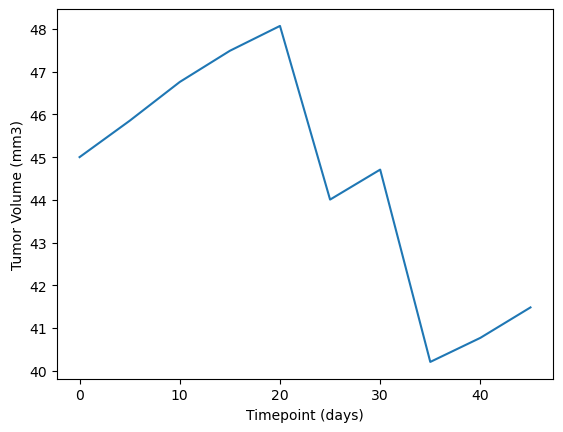

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#loc from main data set where drug regimen == capomulin
#2nd loc mouse id == mouse l509
#x values timepoint - data_no_duplicate Timepoint
#y values tumor volume
data_capomulin = data_no_duplicate[data_no_duplicate["Drug Regimen"] == "Capomulin"]
data_capomulin_l509 = data_capomulin[data_capomulin["Mouse ID"] == "l509"]

x_values = data_capomulin_l509["Timepoint"]
y_values = data_capomulin_l509["Tumor Volume (mm3)"]

# Plotting the data
plt.plot(x_values, y_values)

# Adding labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel("Tumor Volume (mm3)")

plt.show()


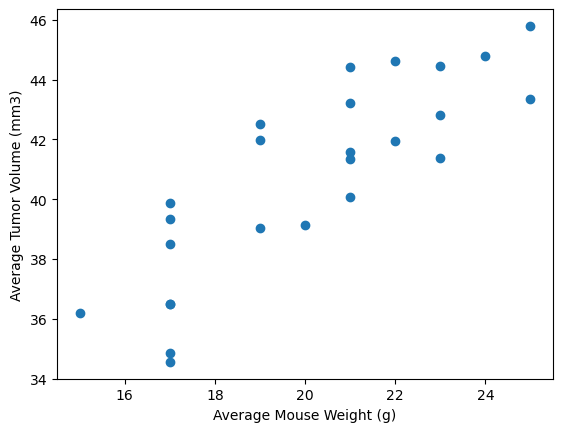

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#loc from main data set where drug regimen == capomulin
#groupby mouse id to get average (mean) of weight and tumor volume columns, to do both use [[]]

data_capomulin_groupbymouse = data_capomulin.groupby(data_capomulin["Mouse ID"])

mouse_weight_mean = data_capomulin_groupbymouse["Weight (g)"].mean()
mouse_tumor_mean = data_capomulin_groupbymouse["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight_mean, mouse_tumor_mean)
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mosue weight and average tumor volume is 0.84.


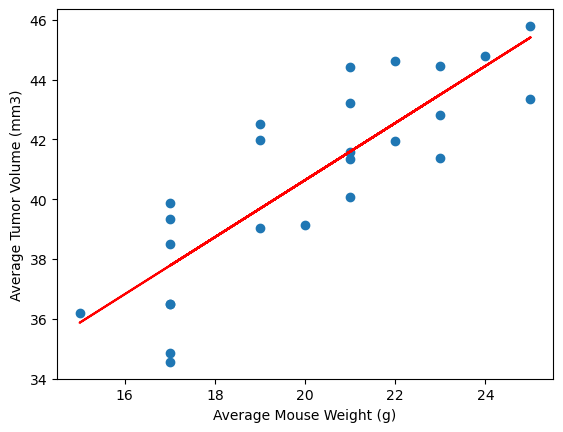

In [50]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
data_capomulin_groupbymouse = data_capomulin.groupby(data_capomulin["Mouse ID"])

mouse_weight_mean = data_capomulin_groupbymouse["Weight (g)"].mean()
mouse_tumor_mean = data_capomulin_groupbymouse["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight_mean, mouse_tumor_mean)
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

m, b, r_value, p_value, stderr = linregress(mouse_weight_mean, mouse_tumor_mean)
correlation_coefficient = r_value
lineq = m*mouse_weight_mean + b

print(f"The correlation between mosue weight and average tumor volume is {round(correlation_coefficient,2)}.")

plt.plot(mouse_weight_mean, lineq, color="red")

plt.show()
